In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, how = "outer")
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
#Average Fare per City
different_types = combined_data.groupby("city")["fare"].mean()
#different_types

In [4]:
#Total Rides per City
rides_per_city = combined_data.groupby("city")["ride_id"].count()
#rides_per_city

In [5]:
#Drivers per City
driver_per_city = combined_data.groupby("city")["driver_count"].mean()
#driver_per_city

In [6]:
#City Type 
type_of_city = city_data.set_index("city")["type"]
type_of_city.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [7]:
scatter_info_df = pd.DataFrame({"Average Fare per City":different_types, "Total Rides":rides_per_city, 
                                "Total Drivers":driver_per_city, "City Type":type_of_city})
scatter_info_df

,Average Fare per City,Total Rides,Total Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural
Brandonfort,35.437368,19,10,Suburban
Carriemouth,28.314444,27,52,Urban
Christopherfurt,24.501852,27,41,Urban
Colemanland,30.894545,22,23,Suburban
Davidfurt,31.995882,17,23,Suburban


In [8]:
#Set City Types
urban = scatter_info_df.loc[scatter_info_df["City Type"]== "Urban"]
rural = scatter_info_df.loc[scatter_info_df["City Type"]== "Rural"]
suburban = scatter_info_df.loc[scatter_info_df["City Type"]== "Suburban"]

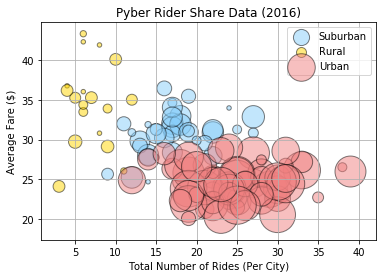

<Figure size 432x288 with 0 Axes>

In [21]:
#Scatter Plot Setup
#Suburban Plots
plt.scatter(suburban["Total Rides"], suburban["Average Fare per City"], color="lightskyblue", edgecolors="black", s = suburban["Total Drivers"]*20,
            label="Suburban", alpha=0.5, linewidth=1.0)
#Rural Plots
plt.scatter(rural["Total Rides"], rural["Average Fare per City"], color="gold", edgecolors="black", s = rural["Total Drivers"]*20,
            label="Rural", alpha=0.5, linewidth=1.0)
#Urban Plots
plt.scatter(urban["Total Rides"], urban["Average Fare per City"], color="lightcoral", edgecolors="black", s = urban["Total Drivers"]*20,
           label="Urban", alpha=0.5, linewidth=1.0)
#Title and X&Y Labels
plt.title("Pyber Rider Share Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

#Legend Placement
plt.legend(loc="best")
#Grid Placement
plt.grid()

plt.show()

plt.savefig("Images/PyberRiderShareData.png")

In [10]:
#Add up all the fares by City Type
cityfare_sum = combined_data.groupby("type")["fare"].sum()
cityfare_sum

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

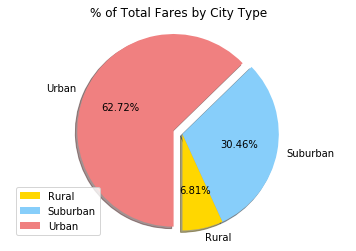

<Figure size 432x288 with 0 Axes>

In [22]:
#Set up the Pie Chart 
explode = (0,0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
labels = cityfare_sum.index

#Pie Chart
plt.pie(cityfare_sum, labels = labels, autopct= "%1.2f%%", explode= explode, colors= colors, 
        shadow=True, startangle=270)
#Make the Pie Chart an Actual Circle and Not an Oval
plt.axis("equal")

#Title
plt.title("% of Total Fares by City Type")

#Legend
plt.legend(loc="lower left")

plt.show()

plt.savefig("%ofTotalFaresbyCityType.png")

In [12]:
#Total Rides by City Type
cityride_counts = combined_data.groupby("type")["ride_id"].count()
cityride_counts

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

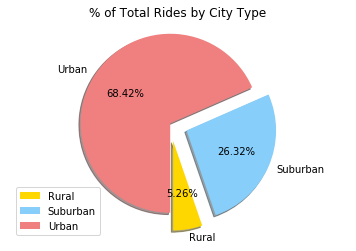

<Figure size 432x288 with 0 Axes>

In [23]:
#Set up the Pie Chart 
explode = (0.2,0.2,0)
colors = ["gold", "lightskyblue", "lightcoral"]
labels = cityride_counts.index

#Pie Chart
plt.pie(cityride_counts, labels = labels, autopct= "%1.2f%%", explode= explode, colors= colors, 
        shadow=True, startangle=270)
#Make the Pie Chart an Actual Circle and Not an Oval
plt.axis("equal")

#Title
plt.title("% of Total Rides by City Type")

#Legend
plt.legend(loc="lower left")

plt.show()

plt.savefig("%ofTotalRidesbyCityType.png")

In [14]:
#Driver Count Per City Type
citydriver_count = combined_data.groupby("type")["driver_count"].mean()
citydriver_count

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

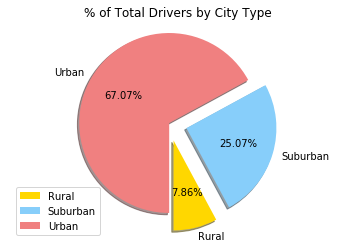

<Figure size 432x288 with 0 Axes>

In [24]:
#Set up the Pie Chart 
explode = (0.2,0.2,0)
colors = ["gold", "lightskyblue", "lightcoral"]
labels = citydriver_count.index

#Pie Chart
plt.pie(citydriver_count, labels = labels, autopct= "%1.2f%%", explode= explode, colors= colors, 
        shadow=True, startangle=270)
#Make the Pie Chart an Actual Circle and Not an Oval
plt.axis("equal")

#Title
plt.title("% of Total Drivers by City Type")

#Legend
plt.legend(loc="lower left")

plt.show()

plt.savefig("%ofTotalDriversbyCityType.png")